<a href="https://colab.research.google.com/github/kang-narae/AI-DL-DA/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94/df%EA%B0%9D%EC%B2%B4%EC%99%80_matplot_%ED%98%B8%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 객체로 pandas의 dataframe객체 만들기

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.express import scatter_3d

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names) # data = 4개씩 들어있는 것.
#datasets의 데이터 사용해서 데이터프레임 만듦.

iris_df['species'] = [iris.target_names[i] for i in iris.target]
iris_df.info()
print(iris_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa

# dataframe객체와 matplotlib 호환

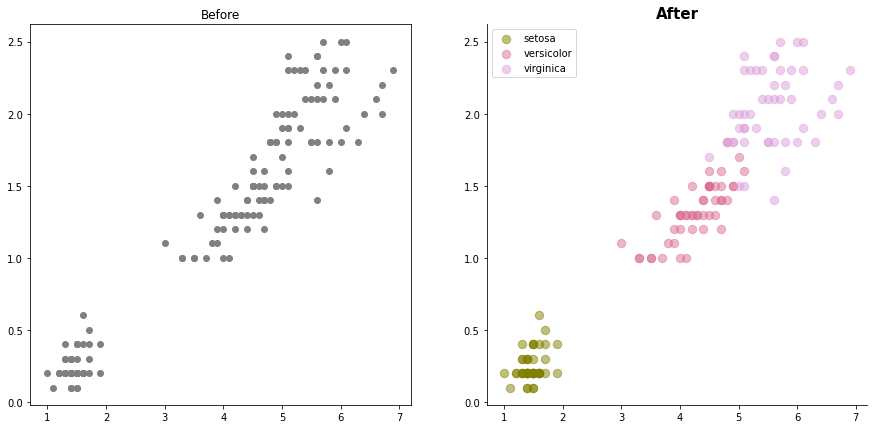

In [ ]:
cmap= plt.get_cmap('Reds')
inner_colors = cmap([0.75, 0.5, 0.35, 0.25])

fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].scatter(x='petal length (cm)', y='petal width (cm)', data=iris_df, color='gray')   #판다스에서 데이터프레임 가지고 바로 맷플랍 그릴 수 있음. 
#맷플랍에서 플랏 그릴때도 데이터를 데이터프레임을 쓸 수 있음. 맷플롯과 판다스가 밀접하게 같이 업데이트 되어야하는이유.. 

#data에 df객체 넣고 x와 y에 컬럼을 넣는다.

ax[0].set_title('Before')



ax[1].scatter(x='petal length (cm)', y='petal width (cm)', data=iris_df[iris_df['species']=='setosa'], color='olive', alpha=0.5, label='setosa', s=70)   #알파값준이유 - 여러개 겹쳐지면 더 진해보이라고
ax[1].scatter(x='petal length (cm)', y='petal width (cm)', data=iris_df[iris_df['species']=='versicolor'], color='palevioletred', alpha=0.5, label='versicolor', s=70) 
ax[1].scatter(x='petal length (cm)', y='petal width (cm)', data=iris_df[iris_df['species']=='virginica'], color='plum', alpha=0.5, label='virginica', s=70) 

ax[1].set_title('After', fontsize=15, fontweight='bold')
ax[1].legend()


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# dataframe으로 다중 plot 그리기

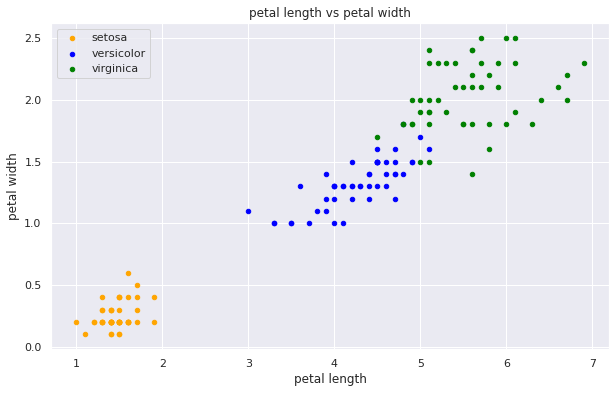

In [ ]:
sns.set(style='darkgrid')       #시본 함수로 plot의 figure 디자인 설정할 수 있음.

axes = iris_df[iris_df['species'] == 'setosa'].plot(kind = 'scatter', 
                                              x = 'petal length (cm)', y = 'petal width (cm)', 
                                              color = 'orange', label = 'setosa', figsize=(10,6))

#iris_df  중 speices컬럼이 setosa인 row로 plot을 그리는데, scatter 그래프이고, x와 y값으로 쓸 컬럼 지정해줌. 그걸 axes 객체에 담음.
# 그이후로는 axes객체에 겹쳐서 그리라는 의미로 매개변수에 ax=axes라고 넣는다.


iris_df[iris_df['species'] == 'versicolor'].plot(kind = 'scatter', 
                                              x = 'petal length (cm)', y = 'petal width (cm)', 
                                              color = 'blue', label = 'versicolor', ax= axes)          #앞에 만든 axes에 겹쳐서 그리라는 뜻.


iris_df[iris_df['species'] == 'virginica'].plot(kind = 'scatter', 
                                              x = 'petal length (cm)', y = 'petal width (cm)', 
                                              color = 'green', label = 'virginica', ax= axes)             

axes.set_xlabel('petal length')
axes.set_ylabel('petal width')
axes.set_title('petal length vs petal width')
plt.show()

# df 객체로 다중 plot 그리는 또다른 방법.(seaborn 이용)

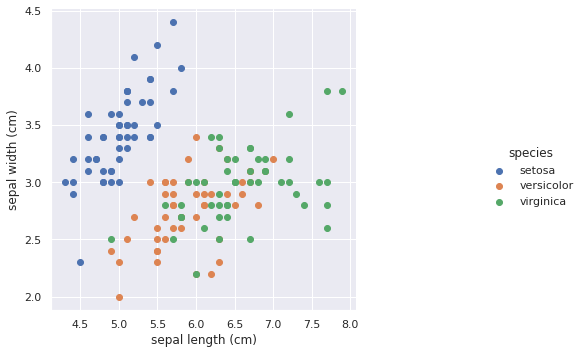

In [ ]:
sns.FacetGrid(iris_df, hue='species').map(plt.scatter, 
                                       'sepal length (cm)', 'sepal width (cm)').add_legend()

# iris_df에서 species별로 나누어 scatter 산점도 그리고, x와 y축 값으로 df의 컬럼을 지정한다. add_legend()로 범례도 표시.

fig= plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# seaborn으로 dataframe의 기준 컬럼을 정한 후, 나머지 각 컬럼별 분포를 산점도로 표현.
# x축과 y축 일치하는 경우는 확률밀도함수.

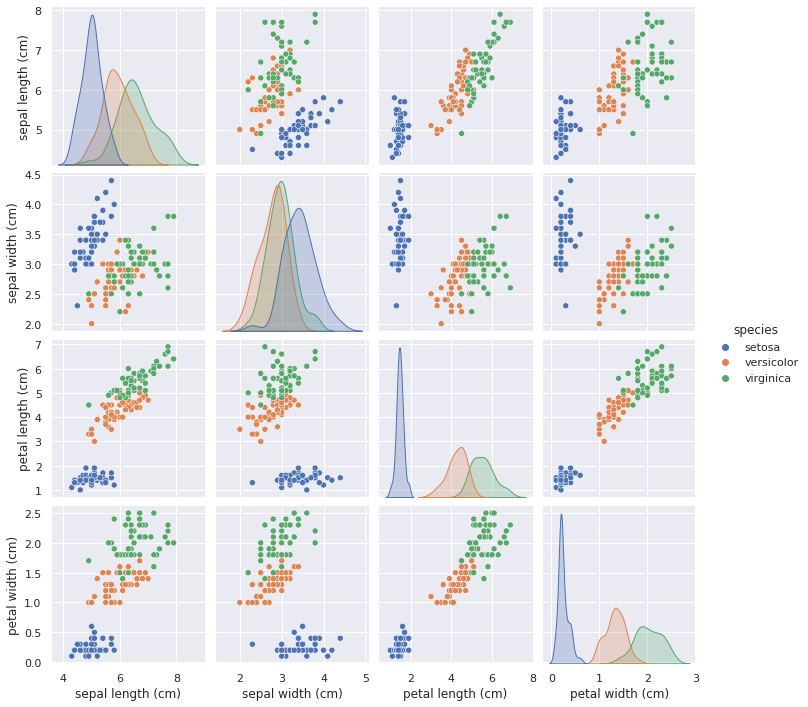

In [ ]:
sns.pairplot(iris_df, hue= 'species')              #대각성분들은 확률밀도함수. 히스토그램을 연결한.   #x축은 사이즈, y축은 빈도. 아까 위에서 확인했을 때 , 겹치는 게 많으면 위로 올라가겠지.
plt.show()

# 3차원 그래프들

In [ ]:

fig= scatter_3d(iris_df, x='sepal length (cm)', y='sepal width (cm)', z='petal width (cm)', color='species')
fig.show()                

In [ ]:
fig= scatter_3d(iris_df, x='sepal length (cm)', y='sepal width (cm)', z='petal width (cm)', color='sepal width (cm)', symbol='species', size= 'petal length (cm)', size_max=18, opacity=0.7)
fig.show()       

# 평균과 표준편차를 매개변수로 가지는 np객체로 히스토그램 만들기

<function matplotlib.pyplot.show>

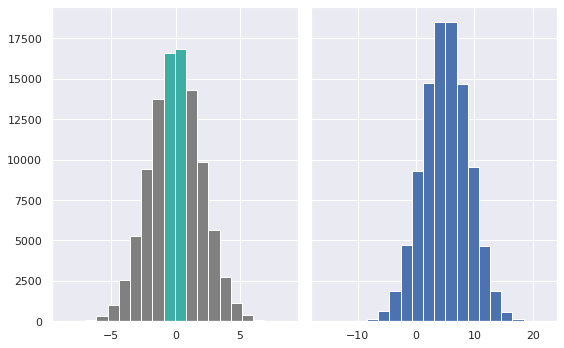

In [ ]:
color_map= ['gray']*20
color_map[9] = color_map[10] = '#3caea3'
N_point = 100000
n_bins=20

dist1=np.random.normal(0, 2, N_point)
dist2 = np.random.normal(0, 10, N_point)*0.4  +5           #평균 0이고 표준편차 10. 이었던 건데 *0.4 +5   -> 평균은 5가 되고, 좌우로 -7, 17 그 안에 대충 다 들어가있지

fig, axes = plt.subplots(1,2, sharey= True, tight_layout=True, figsize=(8,5))

N, bins, patches = axes[0].hist(dist1, bins=n_bins)

for i, patch in enumerate(patches):
  patch.set_facecolor(color_map[i])


axes[1].hist(dist2, bins=n_bins)


plt.show

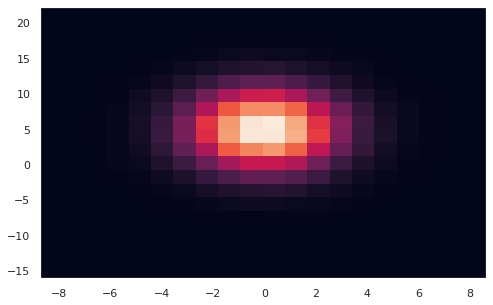

In [ ]:
fig, ax= plt.subplots(figsize=(8,5))
hist = ax.hist2d(dist1, dist2, bins=20)   #각각을 x,y축으로 하는 히스토그램이 그려짐.           #bins는 빈도수??




plt.show()

# 3차원 히스토그램

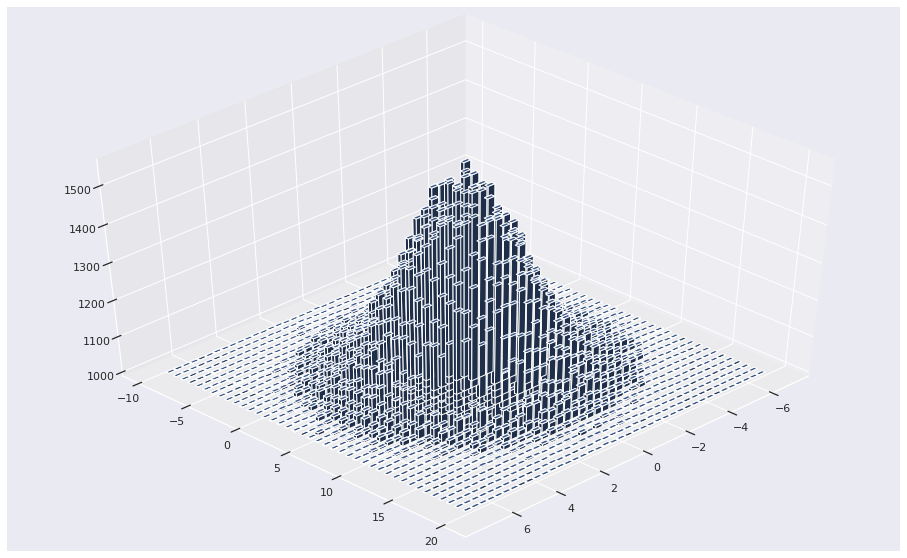

In [ ]:
fig= plt.figure(figsize=(16, 10))
ax =fig.add_subplot(projection='3d')

hist, xedges, yedges = np.histogram2d(dist1, dist2, bins=40,
                                      range=[[-7,7], [-10,20]])

xpos, ypos= np.meshgrid(xedges[:-1]+0.25, yedges[:-1]+0.5, indexing='ij')

xpos= xpos.ravel()
ypos= ypos.ravel()

zpos= 1000
dx= dy = 0.3 * np.ones_like(zpos)
dz= hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.view_init(elev=45., azim=45)
plt.show()


# 확률밀도함수와 히스토그램

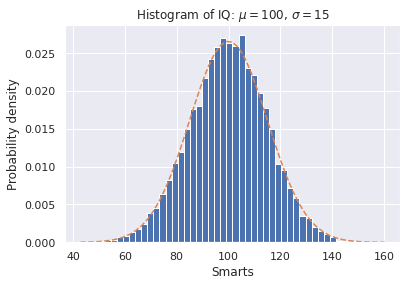

In [ ]:
mu = 100
sigma = 15
x = np.random.normal(mu,sigma, 10000)   #수가 많아질수록 확률밀도함수에 유사해진다.

num_bins = 50

fig, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins, density = True)         #density 디폴트는 false. 그러면 도수(개수)가 나옴. True는 밀도비율.
y = ((1/ (np.sqrt(2*np.pi)*sigma))*
     np.exp(-0.5 * (1/sigma * (bins - mu))**2))
ax.plot(bins, y, '--')                 #확률밀도함수  -- 그래프
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of IQ: $\mu=100$, $\sigma=15$')
plt.show()

# figure를 subplot으로 그리드 나눈 후 다중 그래프 그리기

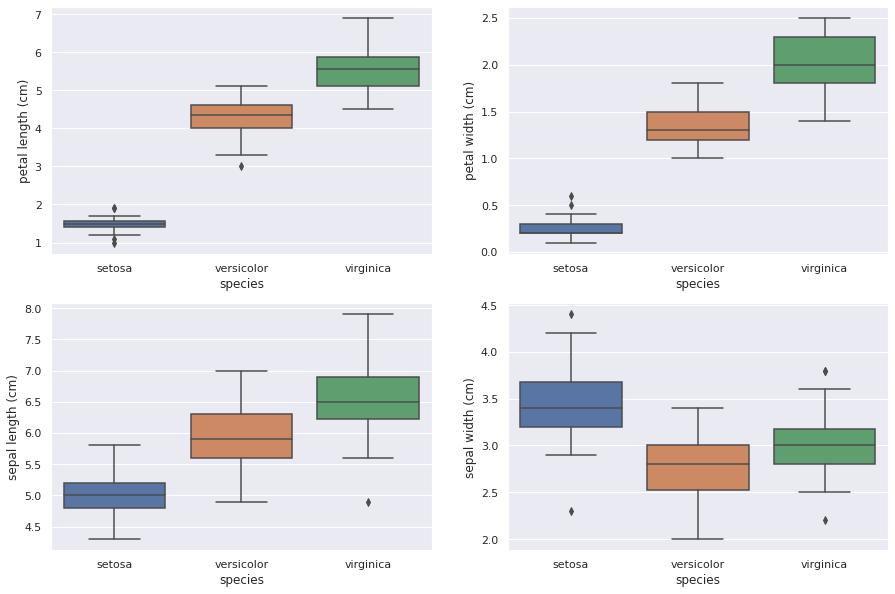

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)     #2행2열로 나눈 것 중 1번째 위치.

sns.boxplot(x='species', y='petal length (cm)', data=iris_df)

plt.subplot(2,2,2)
sns.boxplot(x='species', y='petal width (cm)', data= iris_df)

plt.subplot(2,2,3)
sns.boxplot(x='species', y='sepal length (cm)', data= iris_df)

plt.subplot(2,2,4)
sns.boxplot(x='species', y='sepal width (cm)', data= iris_df)           
#최소/1분위/2분위/3분위/최대. 근데 , 이상치는 뺀 거임.14분위와 34분위 값 사이의 범위의 1.5배 넘으면 이상치로 봄. 점찍힌 게 이상치임.


plt.show()

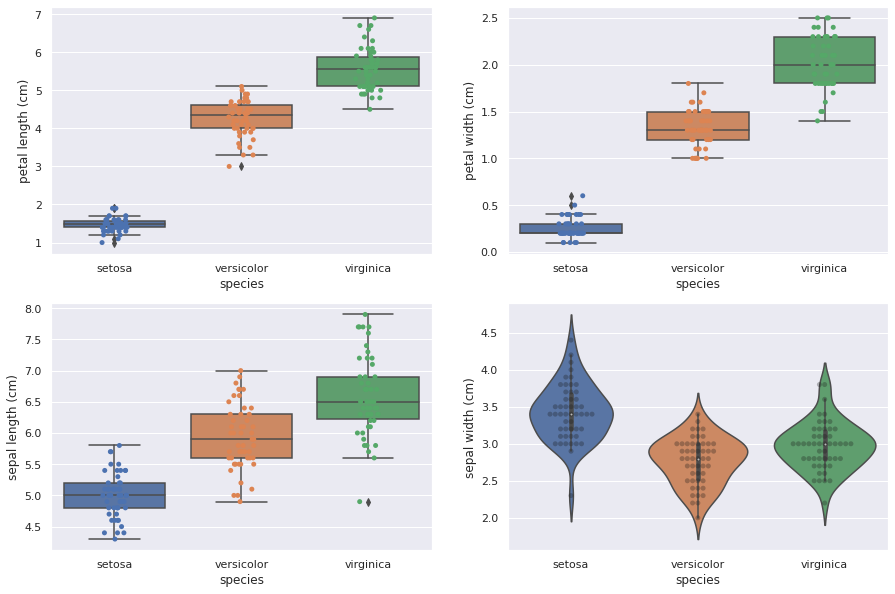

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='species', y = 'petal length (cm)', data = iris_df)
sns.stripplot(x='species', y = 'petal length (cm)', data = iris_df)

plt.subplot(2,2,2)
sns.boxplot(x='species', y = 'petal width (cm)', data = iris_df)
sns.stripplot(x='species', y = 'petal width (cm)', data = iris_df)

plt.subplot(2,2,3)
sns.boxplot(x='species', y = 'sepal length (cm)', data = iris_df)
sns.stripplot(x='species', y = 'sepal length (cm)', data = iris_df)

plt.subplot(2,2,4)
sns.violinplot(x='species', y = 'sepal width (cm)', data = iris_df, whis=np.inf)  #whis=np.inf 이상치 안 따지겠다           viloin은 대략적인 분포까지 볼 수 있음
sns.swarmplot(x='species', y = 'sepal width (cm)', data = iris_df, color='k', alpha=0.3)  #swarmplot은 가로로 정렬해서 분포를 보기 쉽게 함
 
plt.show()